# Setup

In [14]:
# !pip install pycaret
# !pip install markupsafe==2.0.1

In [15]:
# pip install scikit-learn==0.23.2

In [6]:
import sklearn
import pandas as pd
import matplotlib.pyplot as  plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
# from pycaret.regression import setup, compare_models

In [17]:
from google.colab import drive
drive.mount('/content/drive')
#data - https://drive.google.com/drive/folders/1kGgNJT8USdDftlK-enqnLXC80yY4AH_h

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

CSI = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/CSUSHPINSA.csv',names = ['date','CSI'],header=0, parse_dates=['date'],date_parser=dateparser)
CPI = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/CPIAUCSL.csv', names = ['date','CPI'],header=0,parse_dates=['date'],date_parser=dateparser)
Emp_Pop = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/EMRATIO.csv', names = ['date','Emp_Pop'],header=0,parse_dates=['date'],date_parser=dateparser)
InfAdj_CSI = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/InfAdj_CSI .csv', names = ['date','InfAdj_CSI'],header=0,parse_dates=['date'],date_parser=dateparser)
Population = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/POPTHM.csv', names = ['date','Population'],header=0,parse_dates=['date'],date_parser=dateparser)
CSI_10 = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/SPCS10RSA.csv', names = ['date','CSI_10'],header=0,parse_dates=['date'],date_parser=dateparser)
Unemp_rate = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/UNRATE.csv', names = ['date','Unemp_rate'],header=0,parse_dates=['date'],date_parser=dateparser)
nasdaq = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/NASDAQCOM.csv', names = ['date','nasdaq'],header=0,parse_dates=['date'],date_parser=dateparser)
SP500 = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/SP500_monthly.csv', names = ['date','SP500'],header=0,parse_dates=['date'],date_parser=dateparser)
Mort_rate = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/mortgage30_monthly.csv', names = ['date','Mort_rate'],header=0,parse_dates=['date'],date_parser=dateparser)
house_construct = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/COMP_mult.csv', names = ['date','house_supply'],header=0,parse_dates=['date'],date_parser=dateparser)
disp_income = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/DSP_income.csv', names = ['date','disp_income'],header=0,parse_dates=['date'],date_parser=dateparser)
house_supply_monthly = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/Supply_monthly.csv', names = ['date','house_supply_monthly'],header=0,parse_dates=['date'],date_parser=dateparser)
per_saving = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/personal_savings.csv', names = ['date','per_saving'],header=0,parse_dates=['date'],date_parser=dateparser)


GDP = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/GDP.csv', names = ['date','GDP'],header=0,parse_dates=['date'],date_parser=dateparser)
Labour_cost = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/Labour_cost_quat.csv', names = ['date','Labour_cost'],header=0,parse_dates=['date'],date_parser=dateparser)
Rental_vacancy = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/Rental_vacancy_quat.csv', names = ['date','Rental_vacancy'],header=0,parse_dates=['date'],date_parser=dateparser)
prop_taxes = pd.read_csv('/content/drive/MyDrive/Home Submission/Model /DATA/prop_taxes_quat.csv', names = ['date','prop_taxes'],header=0,parse_dates=['date'],date_parser=dateparser)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry poi

# Data Preparation 

In [8]:
# all the factors

factor_dict = {
    'csi': CSI,
    'cpi':CPI,
    'Emp_Pop':Emp_Pop,
    'InfAdj_CSI':InfAdj_CSI,
    'Mort_rate':Mort_rate,
    'Population':Population,
   # 'SP500':SP500,           # from 2013
    # 'CSI_10':CSI_10,
    'Unemp_rate':Unemp_rate,
    'nasdaq':nasdaq,
    'house_construct':house_construct,
    'disp_income':disp_income,
    'house_supply_monthly':house_supply_monthly,
    'per_saving':per_saving,
    }

factor_quat = {
        'GDP':GDP,
        'Labour_cost':Labour_cost,
        'Rental_vacancy':Rental_vacancy,
        'prop_taxes':prop_taxes,
    }



In [9]:
# merging monthly factors 

df = CSI

for name,fact in factor_dict.items():
  # print('\n------{}-------\n'.format(name))
  df = df.merge(fact, on='date',suffixes=('_target', '_y'))
  # print(df.head(10))

df.drop(['CSI_y'], axis= 1, inplace = True)


In [10]:
#merging quaterly factors and linear interpolating values to monthly:

df_quat = pd.DataFrame(CSI.date)
for name,fact in factor_quat.items():
  df_quat= df_quat.merge(fact, how='outer')

for i in range(0,12):                                     #copying first 12 values from 1988 year
  df_quat.loc[i, 'prop_taxes'] = df_quat.loc[i+12, 'prop_taxes']

for name,fact in factor_quat.items():                     #interpolation
  df_quat[name].interpolate(method='linear', inplace=True)
  


df = df.merge(df_quat, on = 'date')

df = df.set_index('date')
df.index = pd.to_datetime(df.index)
df.nasdaq = df.nasdaq.astype('float32')

In [13]:
df

,CSI_target,CPI,Emp_Pop,InfAdj_CSI,Mort_rate,Population,Unemp_rate,nasdaq,house_supply,disp_income,house_supply_monthly,per_saving,GDP,Labour_cost,Rental_vacancy,prop_taxes
date,,,,,,,,,,,,,,,,
1987-01-01,63.735,111.400,61.0,62.19553,9.2040,241857.0,6.6,384.227142,136.7,6159.5,6.0,9.7,4722.156000,88.040121,7.400000,2409.000000
1987-02-01,64.134,111.800,61.1,62.41771,9.0825,242005.0,6.6,411.712646,117.8,6192.1,6.2,8.5,4750.157333,87.713226,7.433333,2420.000000
1987-03-01,64.470,112.200,61.2,62.49543,9.0350,242166.0,6.6,432.204559,126.4,6200.0,6.0,8.5,4778.158667,87.386331,7.466667,2431.000000
1987-04-01,64.974,112.700,61.3,62.59973,9.8325,242338.0,6.3,422.771423,135.6,5967.2,6.0,4.5,4806.160000,87.059437,7.500000,2442.000000
1987-05-01,65.549,113.000,61.6,62.84859,10.5960,242516.0,6.3,416.634003,131.4,6209.1,6.7,8.2,4832.291667,87.039587,7.700000,2459.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,278.694,280.126,59.5,108.32838,3.0980,332640.0,3.9,15474.431641,127.3,15442.7,5.6,8.7,24258.761000,125.694729,5.733333,11485.666667
2022-01-01,282.069,281.933,59.7,109.40715,3.4450,332684.0,4.0,14531.377930,87.1,15163.5,5.7,5.8,24386.734000,126.274703,5.800000,11501.000000
2022-02-01,287.304,284.182,59.9,110.70095,3.7625,332750.0,3.8,13898.727539,98.6,15173.6,6.0,5.8,18350.841500,125.875439,5.797037,11501.000000


# Regression Approach 


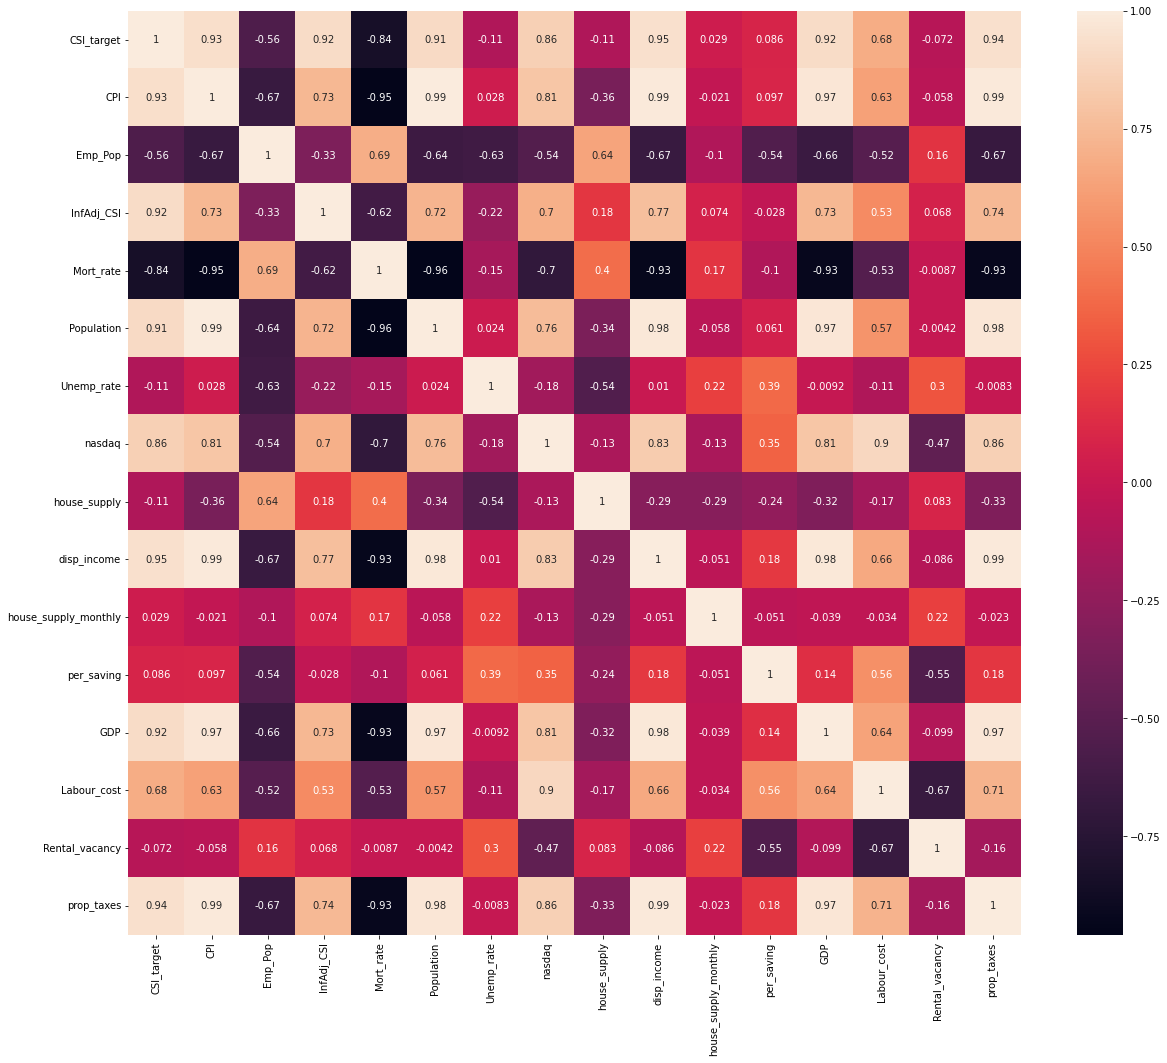

In [9]:
# correlation
# multi collinearity analysis 

cor = df.corr()#method='spearman')
fig, ax  = plt.subplots(figsize=(20,17))
sns.heatmap(cor, ax  = ax, annot = True,)


In [11]:
df1 = df.copy()

# target = df1.CSI_target
target = df1.InfAdj_CSI
df1.drop('CPI',axis = 1, inplace = True)

df1.drop(['CSI_target' ], axis = 1, inplace = True)


df1.drop(['InfAdj_CSI','house_supply_monthly','nasdaq','Rental_vacancy', 'per_saving','Emp_Pop'], axis = 1, inplace = True) 
# df1['pop_pc'] = df1['Population'].pct_change()

df1 = df1.shift(2)
# df1['CSI_lag2'] = target.shift(3)
# df1['CSI_lag3'] = target.shift(3)

df1.dropna(inplace=True )
target = target.iloc[2:]
# datetime features
# df1['year'] = df1.index.year


# standard Scaling 

# scaler  = StandardScaler()
# scaler.fit(df1)
# df1 = pd.DataFrame(scaler.transform(df1),index = df1.index , columns = df1.columns)

# datetime features 

df1['month'] = df1.index.month


# cyclical encoding 

# df1['month'] = np.sin(2 * np.pi * df1['month']/12.0).astype('float16')


In [28]:
df1

,Mort_rate,Population,Unemp_rate,house_supply,disp_income,GDP,Labour_cost,prop_taxes,month
date,,,,,,,,,
1987-03-01,9.2040,241857.0,6.6,136.7,6159.5,4722.156000,88.040121,2409.000000,3
1987-04-01,9.0825,242005.0,6.6,117.8,6192.1,4750.157333,87.713226,2420.000000,4
1987-05-01,9.0350,242166.0,6.6,126.4,6200.0,4778.158667,87.386331,2431.000000,5
1987-06-01,9.8325,242338.0,6.3,135.6,5967.2,4806.160000,87.059437,2442.000000,6
1987-07-01,10.5960,242516.0,6.3,131.4,6209.1,4832.291667,87.039587,2459.666667,7
...,...,...,...,...,...,...,...,...,...
2021-12-01,3.0675,332513.0,4.6,110.8,15472.4,24002.815000,124.534780,11455.000000,12
2022-01-01,3.0675,332598.0,4.2,111.7,15470.8,24130.788000,125.114754,11470.333333,1
2022-02-01,3.0980,332640.0,3.9,127.3,15442.7,24258.761000,125.694729,11485.666667,2


In [ ]:
# setup(df1, target = 'InfAdj_CSI')

In [ ]:
# best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3579,4.857000e-01,0.6255,0.9977,0.0071,0.0044,0.456
knn,K Neighbors Regressor,0.4676,1.777100e+00,0.9981,0.9924,0.0107,0.0056,0.062
rf,Random Forest Regressor,0.7098,1.756800e+00,1.2467,0.9910,0.0148,0.0089,0.542
gbr,Gradient Boosting Regressor,0.9729,2.377400e+00,1.4543,0.9882,0.0174,0.0123,0.110
dt,Decision Tree Regressor,0.8447,2.954500e+00,1.5406,0.9840,0.0185,0.0106,0.016
lightgbm,Light Gradient Boosting Machine,1.1133,3.754600e+00,1.8152,0.9816,0.0200,0.0134,0.070
ada,AdaBoost Regressor,1.8507,5.176600e+00,2.2668,0.9729,0.0302,0.0255,0.108
lr,Linear Regression,3.0086,1.691670e+01,4.0013,0.9144,0.0501,0.0400,0.323
ridge,Ridge Regression,3.0019,1.695290e+01,4.0035,0.9143,0.0501,0.0398,0.014
br,Bayesian Ridge,3.0089,1.737240e+01,4.0440,0.9122,0.0503,0.0399,0.014


In [267]:
df1.head()

,Mort_rate,Population,Unemp_rate,house_supply,disp_income,GDP,Labour_cost,prop_taxes,month
date,,,,,,,,,
1987-03-01,9.2040,241857.0,6.6,136.7,6159.5,4722.156000,88.040121,2409.000000,3
1987-04-01,9.0825,242005.0,6.6,117.8,6192.1,4750.157333,87.713226,2420.000000,4
1987-05-01,9.0350,242166.0,6.6,126.4,6200.0,4778.158667,87.386331,2431.000000,5
1987-06-01,9.8325,242338.0,6.3,135.6,5967.2,4806.160000,87.059437,2442.000000,6
1987-07-01,10.5960,242516.0,6.3,131.4,6209.1,4832.291667,87.039587,2459.666667,7


In [23]:
X_train = df1.loc[df1.index < '2012-01-01']
X_test  = df1.loc[df1.index >= '2012-01-01']
Y_train = target.loc[df1.index < '2012-01-01']
Y_test = target.loc[df1.index >= '2012-01-01']


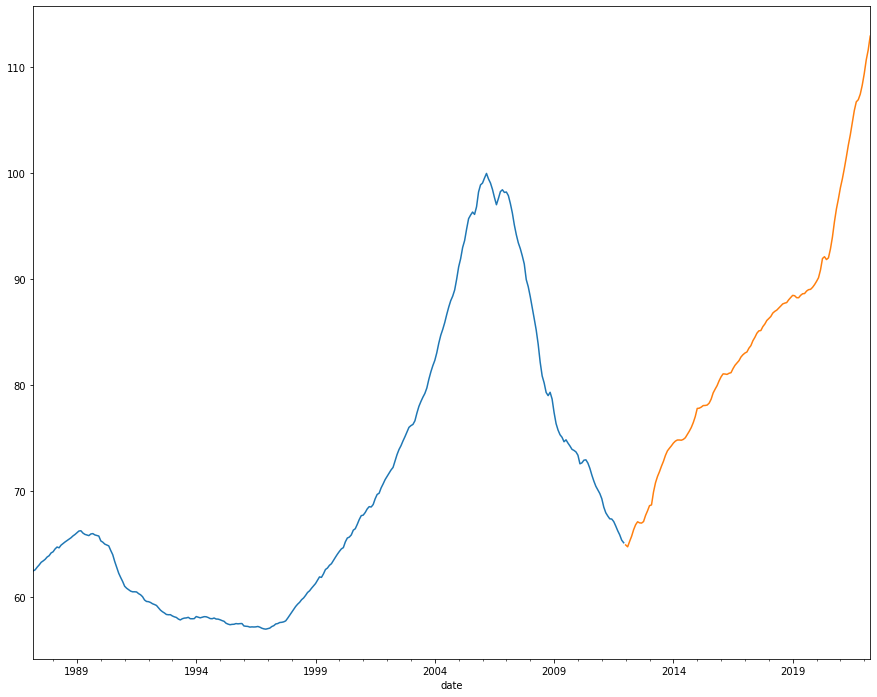

In [27]:
fig, ax = plt.subplots(figsize = (15,12))
Y_train.plot(ax = ax, label = 'training set')
Y_test.plot(ax = ax, label = 'test set')
plt.show()

## XG boost 

In [34]:
import xgboost as xgb


In [45]:
reg = xgb.XGBRegressor(n_estimators=3000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(X_train, Y_train, 
        eval_set = [(X_train,Y_train), (X_test,Y_test)],
       verbose = 1000 )

[07:54:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:69.8338	validation_1-rmse:83.5104
[1000]	validation_0-rmse:0.234793	validation_1-rmse:15.4801
[2000]	validation_0-rmse:0.112942	validation_1-rmse:15.5299
[2999]	validation_0-rmse:0.067642	validation_1-rmse:15.4966


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=3000)

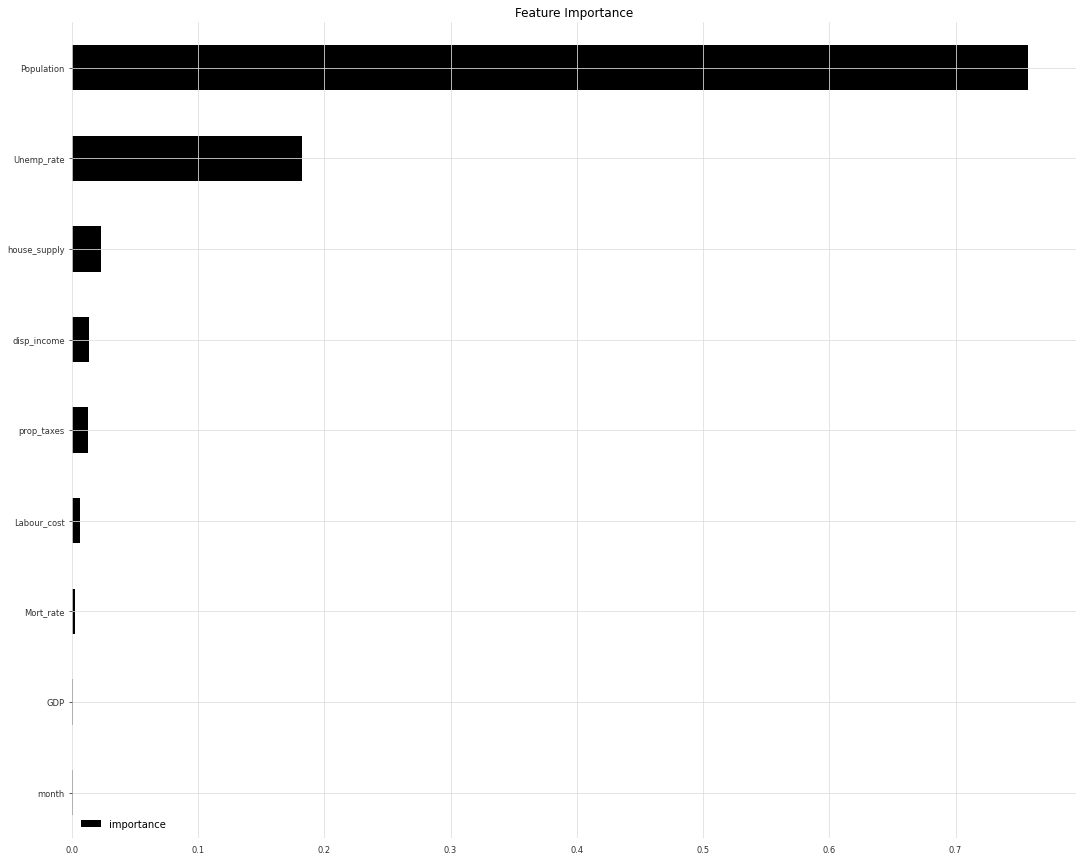

In [249]:
fg, ax = plt.subplots(figsize = (18,15))
feat_imp = pd.DataFrame(reg.feature_importances_, index = reg.get_booster().feature_names, columns = ['importance'])
feat_imp.sort_values('importance').plot(kind = 'barh', title = 'Feature Importance',ax = ax)
plt.show()

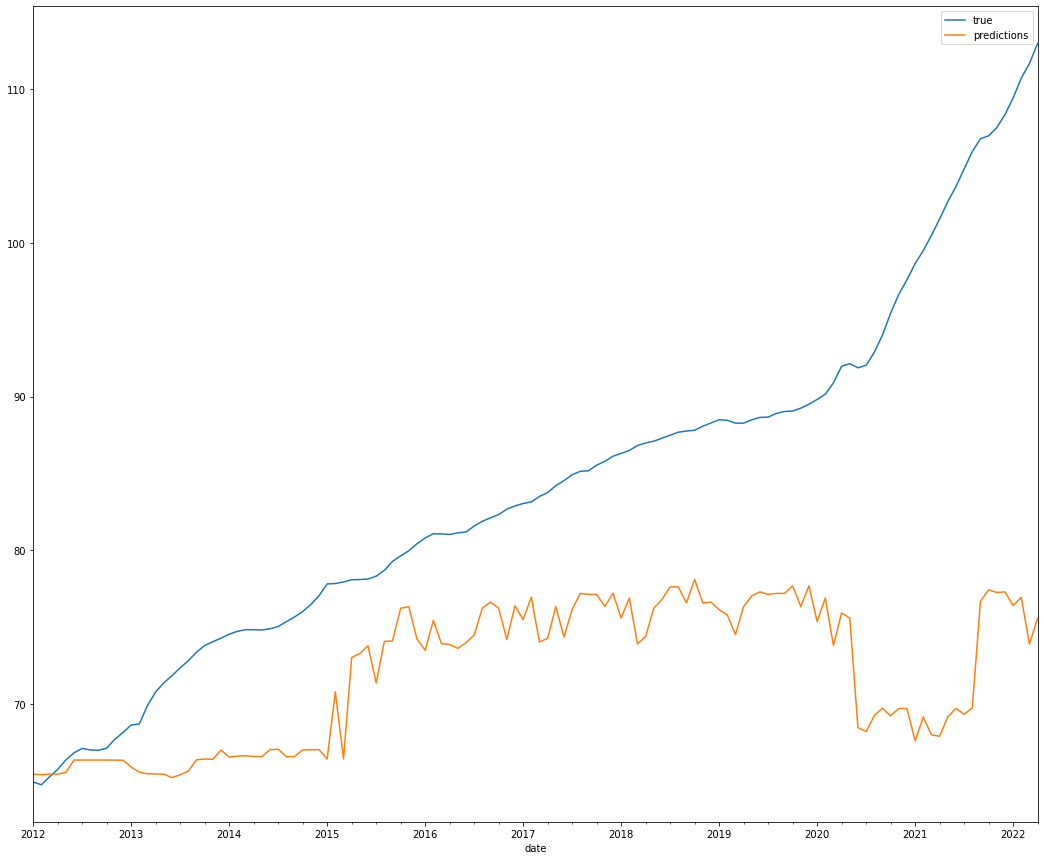

15.496593657244512

In [49]:
X_test1 = X_test.copy()
X_test1['predictions'] = reg.predict(X_test)

ax = Y_test.plot(figsize = (18,15), label = 'true')
X_test1['predictions'].plot(ax = ax,label = 'predictions')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_true =  Y_test.values, y_pred = X_test1['predictions'])
MSE
MSE**(0.5)


In [55]:
Y_test.std()

11.442647669335106

## Extra tree regressor 

In [32]:
from sklearn.ensemble import ExtraTreesRegressor



In [51]:
reg = ExtraTreesRegressor(n_estimators=3000)
reg.fit(X_train, Y_train)

ExtraTreesRegressor(n_estimators=3000)

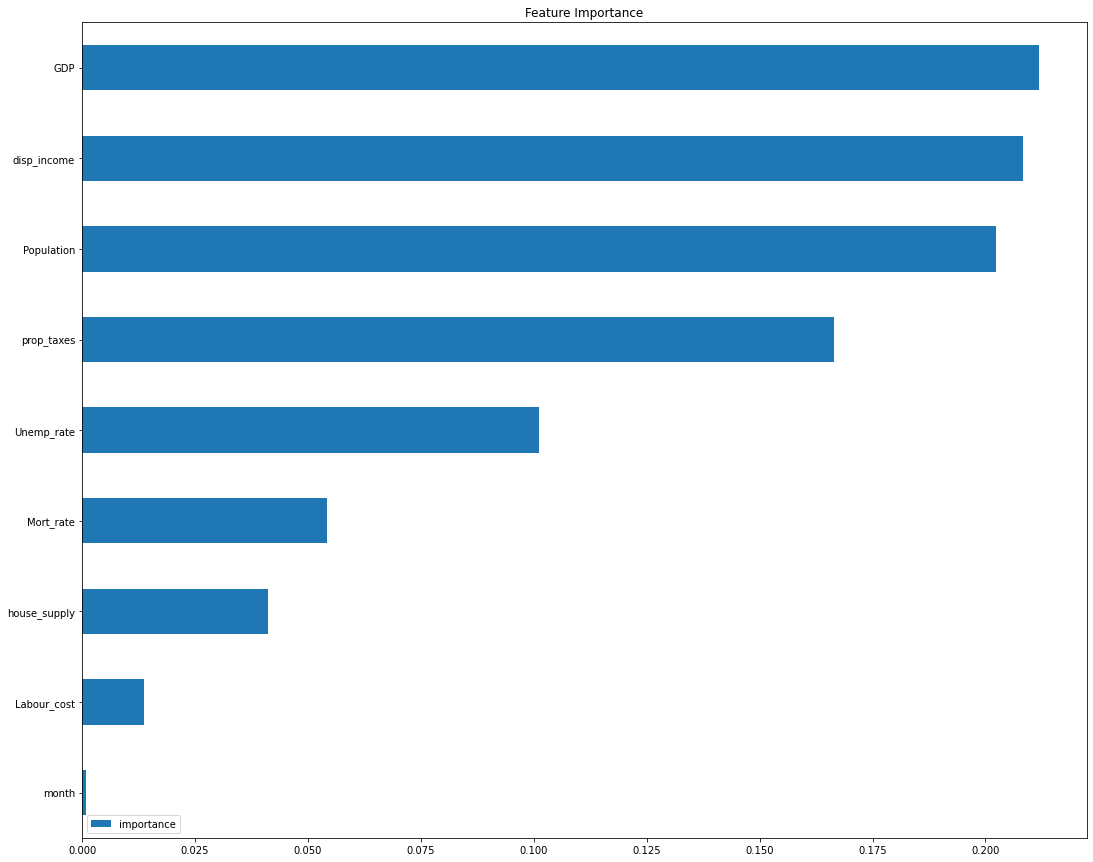

In [52]:
fg, ax = plt.subplots(figsize = (18,15))
feat_imp = pd.DataFrame(reg.feature_importances_, index =X_train.columns , columns = ['importance'])
feat_imp.sort_values('importance').plot(kind = 'barh', title = 'Feature Importance',ax = ax)
plt.show()

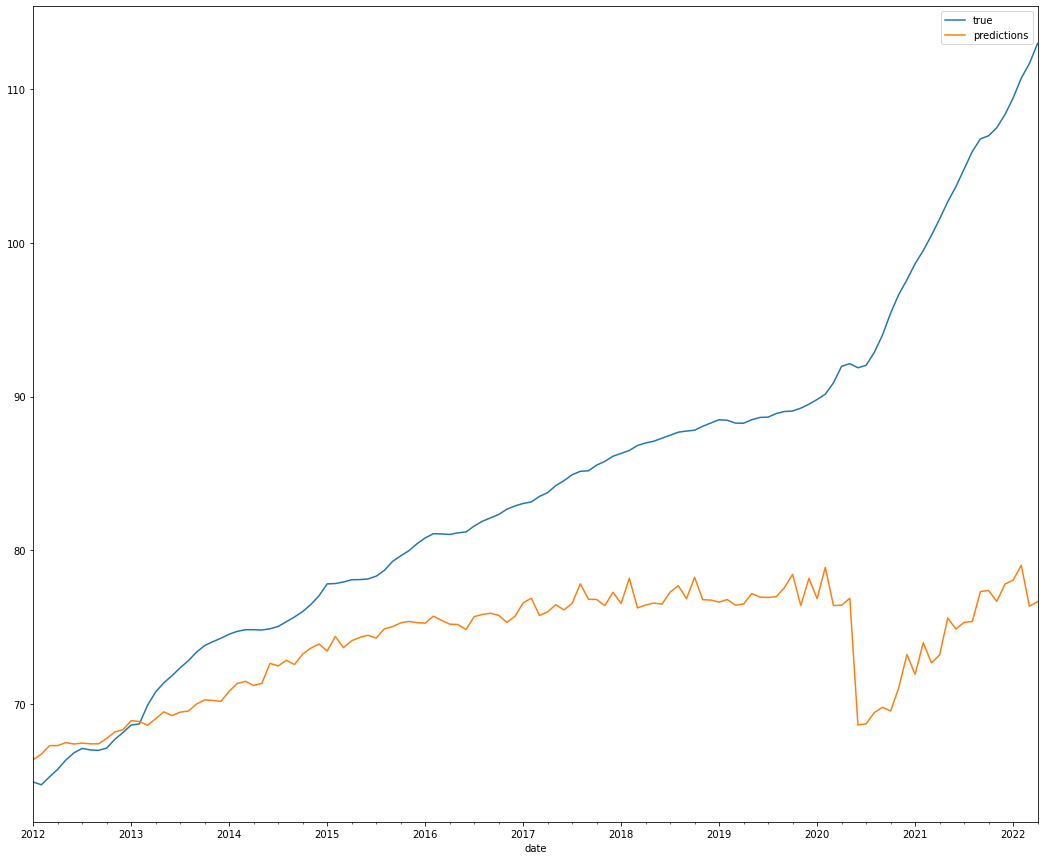

13.955067711957629

In [54]:
X_test1 = X_test.copy()
X_test1['predictions'] = reg.predict(X_test)

ax = Y_test.plot(figsize = (18,15), label = 'true')
X_test1['predictions'].plot(ax = ax,label = 'predictions')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_true =  Y_test.values, y_pred = X_test1['predictions'])
MSE
MSE**(0.5)


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_true =  Y_test.values, y_pred = X_test1['predictions'])
MSE
MSE**(0.5)

13.925979229104632

## Gradient boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import BayesianRidge

In [251]:
reg = GradientBoostingRegressor(n_estimators=10000, learning_rate = 0.01)
reg.fit(X_train, Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=10000)

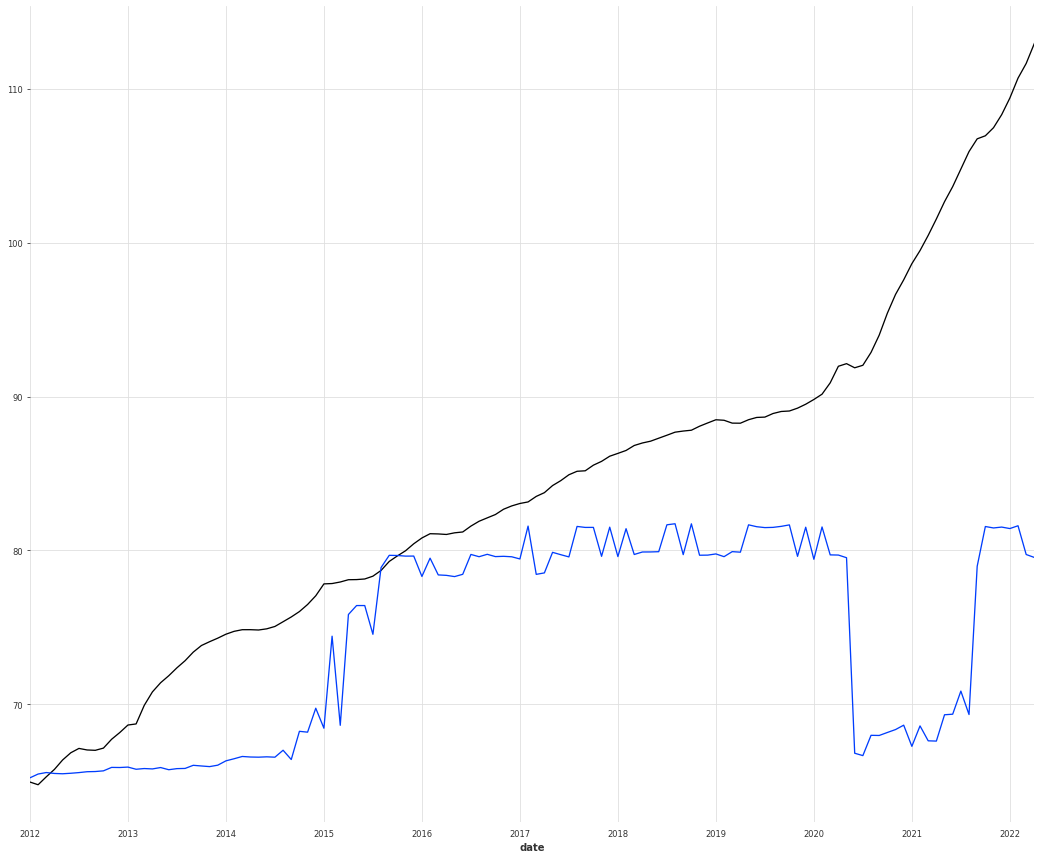

In [252]:
y_pred= reg.predict(X_test)

X_test1 = X_test.copy()
X_test1['predictions'] = y_pred
ax = Y_test.plot(figsize = (18,15))
X_test1['predictions'].plot(ax = ax)
plt.show()


## bagging ensemble model

In [57]:
models = {'gbr':GradientBoostingRegressor(n_estimators=10000, learning_rate = 0.01),
          'br':BayesianRidge(),
          'xgb': xgb.XGBRegressor(n_estimators=3000, early_stopping_rounds = 50, learning_rate = 0.001,verbose = 0),
          'etr':ExtraTreesRegressor(n_estimators=3000)}

In [58]:
for name, model in models.items():
  model.fit(X_train, Y_train)


[08:49:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


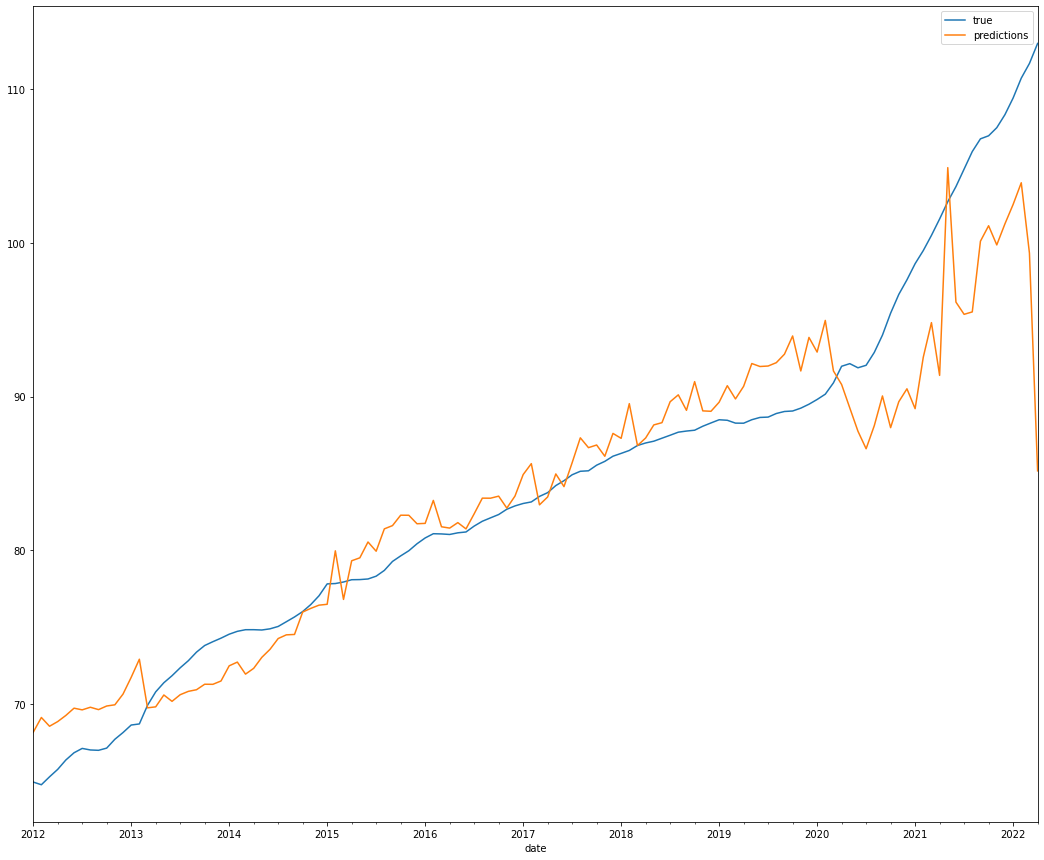

4.456992107899007

In [76]:
y_pred = (
    0.15 * models['gbr'].predict(X_test) +
    0.25 *models['br'].predict(X_test) +
    0.4 *models['etr'].predict(X_test) +
    0.2 * models['xgb'].predict(X_test))


X_test1 = X_test.copy()
X_test1['predictions'] = y_pred
ax = Y_test.plot(figsize = (18,15), label = 'true')
X_test1['predictions'].plot(ax = ax,label = 'predictions')
plt.legend()
plt.show()
MSE = mean_squared_error(y_true =  Y_test.values, y_pred = X_test1['predictions'])
MSE
MSE**(0.5)

In [64]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.sqrt(-cross_val_score(model, df1, target, scoring='neg_mean_squared_error', cv=kf))
    results[name] = result

[10:03:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:03:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [65]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
gbr
5.190255777086366
4.482449281626742
----------
br
7.346395731053842
3.8106547123155434
----------
xgb
7.452391132553402
6.537198307354843
----------
etr
4.208012381326437
4.504610177953215


# Vector AutoRegression 

In [78]:
# df2 = df.copy()
# df2.drop(['house_supply',  'per_saving','Emp_Pop', 'house_supply_monthly','nasdaq','Rental_vacancy','Labour_cost','Population','InfAdj_CSI'], axis = 1, inplace = True)
# # df2['Population'] = df['Population'].pct_change()
# # df2.dropna(axis = 0, inplace = True)
# target2 = df2.CSI_target
# df2.head()
df2 = df.copy()
df2.drop([ 'house_supply', 'CPI', 'per_saving','Emp_Pop', 'house_supply_monthly','nasdaq','Rental_vacancy','Labour_cost','CSI_target'], axis = 1, inplace = True)
# df2['Population'] = df['Population'].pct_change()
# df2.dropna(axis = 0, inplace = True)
# target2 = df2.InfAdj_CSI
df2.head()

,InfAdj_CSI,Mort_rate,Population,Unemp_rate,disp_income,GDP,prop_taxes
date,,,,,,,
1987-01-01,62.19553,9.2040,241857.0,6.6,6159.5,4722.156000,2409.000000
1987-02-01,62.41771,9.0825,242005.0,6.6,6192.1,4750.157333,2420.000000
1987-03-01,62.49543,9.0350,242166.0,6.6,6200.0,4778.158667,2431.000000
1987-04-01,62.59973,9.8325,242338.0,6.3,5967.2,4806.160000,2442.000000
1987-05-01,62.84859,10.5960,242516.0,6.3,6209.1,4832.291667,2459.666667


In [71]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import warnings
warnings.filterwarnings('ignore')

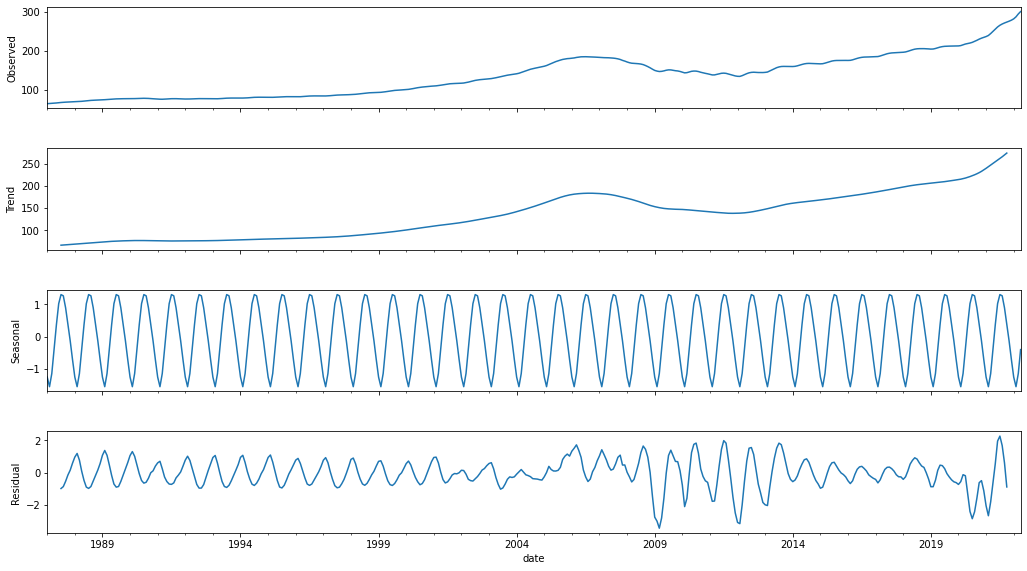

In [81]:
decomp = sm.tsa.seasonal_decompose(df['CSI_target'],model = 'additive')
 
fig = decomp.plot()
fig.set_size_inches((16, 9))
plt.show()

In [79]:
# adfuller test
def adftest(df):
 
  for fact in df:
    print('\n-------{}-------\n'.format(fact))
    adf = adfuller(df[fact])
    print(f'ADF Statistic: {adf[0]}')
    print(f'p-value: {adf[1]}')
 
adftest(df2.diff(1)[1:])




-------InfAdj_CSI-------

ADF Statistic: -2.9127271274156596
p-value: 0.043887896852186636

-------Mort_rate-------

ADF Statistic: -10.322781972846803
p-value: 2.9788996059807623e-18

-------Population-------

ADF Statistic: -1.3441471062298131
p-value: 0.6087409105887466

-------Unemp_rate-------

ADF Statistic: -12.1275063492022
p-value: 1.7667530500682174e-22

-------disp_income-------

ADF Statistic: -4.462838431231033
p-value: 0.00022938490894836274

-------GDP-------

ADF Statistic: -8.749766128154748
p-value: 2.857550554251797e-14

-------prop_taxes-------

ADF Statistic: -3.7979600886659948
p-value: 0.002928255045692676


## DARTS - Vector AutoRegression

In [92]:
!pip install darts



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400 kB 14.6 MB/s 
     |████████████████████████████████| 1.4 MB 60.2 MB/s 
     |████████████████████████████████| 9.8 MB 43.3 MB/s 
     |████████████████████████████████| 793 kB 86.5 MB/s 
     |████████████████████████████████| 585 kB 61.2 MB/s 
     |████████████████████████████████| 45 kB 3.8 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 11.2 MB 50.6 MB/s 
     |████████████████████████████████| 381 kB 72.2 MB/s 
     |████████████████████████████████| 944 kB 71.5 MB/s 
     |████████████████████████████████| 596 kB 56.1 MB/s 
     |████████████████████████████████| 141 kB 64.6 MB/s 
     |████████████████████████████████| 419 kB 75.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninst

In [93]:
!pip install pyyaml==5.4.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 13.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [1]:
import darts as dts
from darts import TimeSeries as ts 
from darts.models import VARIMA

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [84]:
df2 = df.copy()
df2.drop([ 'house_supply',  'per_saving','Emp_Pop', 'house_supply_monthly','nasdaq','Rental_vacancy','Labour_cost','CSI_target'], axis = 1, inplace = True)
# df2['Population'] = df['Population'].pct_change()
# df2.dropna(axis = 0, inplace = True)
# target2 = df2.InfAdj_CSI
df2.head()

,CPI,InfAdj_CSI,Mort_rate,Population,Unemp_rate,disp_income,GDP,prop_taxes
date,,,,,,,,
1987-01-01,111.4,62.19553,9.2040,241857.0,6.6,6159.5,4722.156000,2409.000000
1987-02-01,111.8,62.41771,9.0825,242005.0,6.6,6192.1,4750.157333,2420.000000
1987-03-01,112.2,62.49543,9.0350,242166.0,6.6,6200.0,4778.158667,2431.000000
1987-04-01,112.7,62.59973,9.8325,242338.0,6.3,5967.2,4806.160000,2442.000000
1987-05-01,113.0,62.84859,10.5960,242516.0,6.3,6209.1,4832.291667,2459.666667


In [85]:
df5 = df2.copy()
tdf = ts.from_dataframe(df5,  value_cols=df5.columns)
X_train, X_test = tdf.split_before(0.75)


In [ ]:
# X_test.to_csv('test')
# X_test = pd.read_csv('/content/test')

In [86]:
model1 = VARIMA(p = 4, d = 1, q = 0)
model1.fit(X_train)
pred1 = model1.predict(len(X_test))
pred1.to_csv('varima')
final = pd.read_csv('/content/varima')
final.index = pd.to_datetime(final['date'])

In [83]:
final

,date,CSI_target,CPI,Mort_rate,Population,Unemp_rate,disp_income,GDP,prop_taxes
date,,,,,,,,,
2013-06-01,2013-06-01,156.227559,232.427727,3.611759,316944.558525,7.540639,12294.696624,16844.119144,8129.445791
2013-07-01,2013-07-01,158.259502,233.043887,3.599564,317172.084197,7.472857,12283.975829,16924.375006,8169.581536
2013-08-01,2013-08-01,159.954452,233.809242,3.619270,317400.683218,7.398775,12347.307443,16990.669409,8194.814069
2013-09-01,2013-09-01,161.325813,234.343974,3.653025,317620.896971,7.293933,12366.169070,17058.236066,8216.637494
2013-10-01,2013-10-01,162.339232,234.785968,3.677188,317831.686960,7.208594,12416.946546,17123.522982,8236.430547
...,...,...,...,...,...,...,...,...,...
2021-12-01,2021-12-01,195.315480,263.273207,2.953263,334561.025999,5.411723,13991.921584,20363.306149,9515.349578
2022-01-01,2022-01-01,195.528098,263.511201,2.942443,334710.286426,5.408635,14004.757143,20388.541533,9526.856161
2022-02-01,2022-02-01,195.740152,263.748574,2.931651,334859.159473,5.405557,14017.559220,20413.710934,9538.332865


9.067300315404804

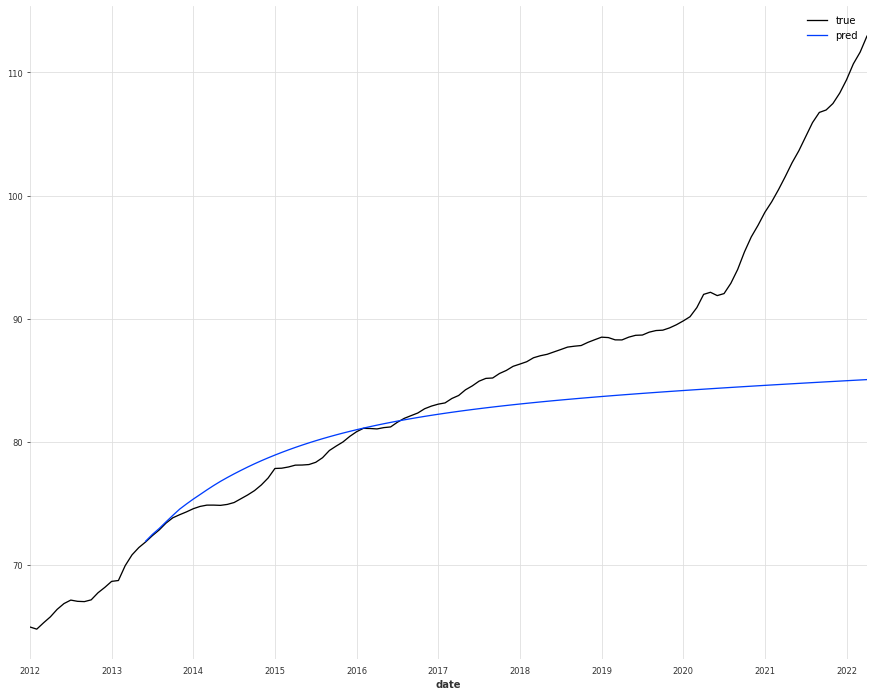

In [89]:
from darts.metrics import mape
# score = mape(X_test,pred1)
# print(score)
# df5['CSI_target'].plot (figsize = (15,12),  label = 'true')
df5[df5.index >= '2012-01-01']['InfAdj_CSI'].plot (figsize = (15,12),  label = 'true')
final['InfAdj_CSI'].plot( label = 'pred')
plt.legend()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

MSE = mean_squared_error(y_true =  df5[df5.index >= '2012-01-01']['InfAdj_CSI'].iloc[17:].values, y_pred = final['InfAdj_CSI'].values)
MSE
MSE**(0.5)